### Autoregressive integrated moving average - ARIMA

In [9]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

def parser(d):
    return datetime.strptime(d, '%Y-%m')
#datetime.strptime('2018-08','%Y-%m')
# 23/11/89 '%d/%m/%y'

<ipython-input-9-78d23e78ea16>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [7]:
#!cd /content
#!git clone https://github.com/dasarpai//Timeseries.git ts
#!ls /content/ts/car-sales/

#file = r'/content/ts/car-sales/car-sales.csv'
file = 'car-sales.csv'

In [10]:
sales = pd.read_csv(file,  parse_dates=[0], index_col=0,  date_parser=parser)
sales.columns = ['sales']
sales.head()

,sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [16]:
sales.index[1]

Timestamp('2016-02-01 00:00:00')

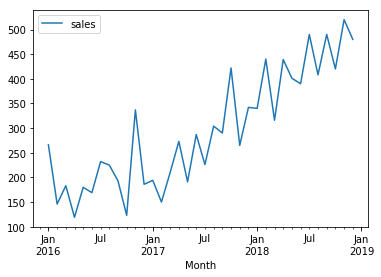

In [17]:
sales.plot()

In [18]:
sales.index[1]

Timestamp('2016-02-01 00:00:00')

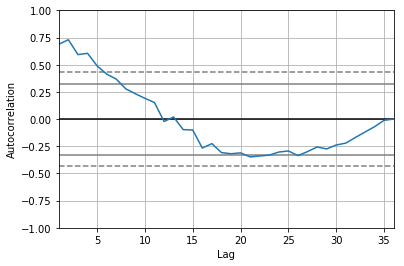

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sales)
plt.show()

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = sales.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size-1:len(X)]
#history = [x for x in train]
predictions = []


298.9622496803392


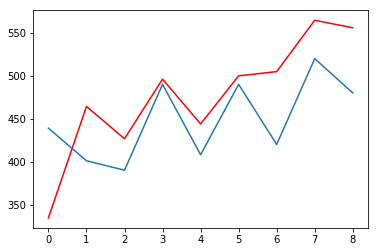

In [26]:
model = ARIMA(train, order=(3, 2, 3))
model_fit = model.fit(transparams=True)
predictions = model_fit.forecast(steps=9)[0]
print(model_fit.aic)
plt.plot(predictions,color='red')
plt.plot(test)

In [22]:
p=d=q=range(0,5)

In [23]:
import itertools
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [24]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [25]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        print(param,model_fit.aic)
    except:
        continue

(0, 0, 0) 335.083276819
(0, 0, 1) 334.36881258471954
(0, 0, 2) 329.3343588243692
(0, 0, 3) 330.93461778402144
(0, 0, 4) nan
(0, 1, 0) 324.398204328
(0, 1, 1) 308.00822037662164
(0, 1, 2) 306.85749158604517
(0, 2, 0) 343.412700879
(0, 2, 1) 318.2411240657502
(1, 0, 0) 330.8689624126697
(1, 0, 4) nan
(1, 1, 0) 309.1895633592268
(1, 1, 1) 306.85894261819476
(1, 1, 2) 306.9919932365832
(1, 1, 3) 311.96210604626356
(1, 1, 4) 309.25661893435506
(1, 2, 0) 317.8772639417982
(1, 2, 1) 304.36105633242715
(1, 2, 2) 299.6134808973754
(1, 2, 3) nan
(1, 2, 4) nan
(2, 0, 0) 322.14928731179566
(2, 0, 1) 332.8624884491109
(2, 0, 4) nan
(2, 1, 0) 310.54360833041517
(2, 1, 1) 308.7289296304666
(2, 1, 4) 311.32916564576215
(2, 2, 0) 317.2961561142684
(2, 2, 1) 305.7736241078404
(2, 2, 3) 302.09988671442164
(3, 0, 0) 324.1106082506423
(3, 0, 1) nan
(3, 0, 4) nan
(3, 1, 0) 305.3298372237035
(3, 1, 1) 306.595723701786
(3, 1, 2) 303.54044727058726
(3, 1, 3) 305.3517090321481
(3, 1, 4) 307.1475363959355
(3, 2,